In [146]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [147]:
df = pd.read_csv("C:/Users/lenovo/Documents/term-deposit-marketing-2020.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
age          40000 non-null int64
job          40000 non-null object
marital      40000 non-null object
education    40000 non-null object
default      40000 non-null object
balance      40000 non-null int64
housing      40000 non-null object
loan         40000 non-null object
contact      40000 non-null object
day          40000 non-null int64
month        40000 non-null object
duration     40000 non-null int64
campaign     40000 non-null int64
y            40000 non-null object
dtypes: int64(5), object(9)
memory usage: 2.9+ MB


In [149]:
def convert_to_int(df, new_column, target_column):
    df[new_column] = df[target_column].apply(lambda x: 0 if x == "no" else 1)
    return df[new_column].value_counts()

In [151]:
convert_to_int(df, "default_int", "default")
convert_to_int(df, "housing_int", "housing")
convert_to_int(df, "loan_int", "loan") 
convert_to_int(df, "y_int", "y") 

0    37104
1     2896
Name: y_int, dtype: int64

In [152]:
lst = [df]

for column in lst:
    column.loc[column["month"] == "jan", "month_int"] = 1
    column.loc[column["month"] == "feb", "month_int"] = 2
    column.loc[column["month"] == "mar", "month_int"] = 3
    column.loc[column["month"] == "apr", "month_int"] = 4
    column.loc[column["month"] == "may", "month_int"] = 5
    column.loc[column["month"] == "jun", "month_int"] = 6
    column.loc[column["month"] == "jul", "month_int"] = 7
    column.loc[column["month"] == "aug", "month_int"] = 8
    column.loc[column["month"] == "sep", "month_int"] = 9
    column.loc[column["month"] == "oct", "month_int"] = 10
    column.loc[column["month"] == "nov", "month_int"] = 11
    column.loc[column["month"] == "dec", "month_int"] = 12

df["month_int"] = df["month_int"].astype(np.int64)
df.head()

for column in lst:
    column.loc[column["job"] == "management", "job_cat"] = 3
    column.loc[column["job"] == "admin", "job_cat"] = 3
    column.loc[column["job"] == "entrepreneur", "job_cat"] = 3
    column.loc[column["job"] == "self-employed", "job_cat"] = 3
    column.loc[column["job"] == "technician", "job_cat"] = 2
    column.loc[column["job"] == "blue-collar", "job_cat"] = 2
    column.loc[column["job"] == "services", "job_cat"] = 2
    column.loc[column["job"] == "retired", "job_cat"] = 2
    column.loc[column["job"] == "unknown", "job_cat"] = 1
    column.loc[column["job"] == "housemaid", "job_cat"] = 1
    column.loc[column["job"] == "student", "job_cat"] = 1
    column.loc[column["job"] == "unemployed", "job_cat"] = 1

df["job_cat"] = df["job_cat"].astype(np.int64)

for column in lst:
    column.loc[column["marital"] == "divorced", "marital_cat"] = 0
    column.loc[column["marital"] == "single", "marital_cat"] = 1
    column.loc[column["marital"] == "married", "marital_cat"] = 2
    
df["marital_cat"] = df["marital_cat"].astype(np.int64)

for column in lst:
    column.loc[column["education"] == "unknown", "education_cat"] = 0
    column.loc[column["education"] == "primary", "education_cat"] = 1
    column.loc[column["education"] == "secondary", "education_cat"] = 2
    column.loc[column["education"] == "tertiary", "education_cat"] = 3
    
df["education_cat"] = df["education_cat"].astype(np.int64)

for column in lst:
    column.loc[column["contact"] == "unknown", "contact_cat"] = 0
    column.loc[column["contact"] == "telephone", "contact_cat"] = 1
    column.loc[column["contact"] == "cellular", "contact_cat"] = 2
    
df["education_cat"] = df["education_cat"].astype(np.int64)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,y,default_int,housing_int,loan_int,y_int,month_int,job_cat,marital_cat,education_cat,contact_cat
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,no,0,1,0,0,5,3,2,3,0.0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,no,0,1,0,0,5,2,1,2,0.0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,no,0,1,1,0,5,3,2,2,0.0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,no,0,1,0,0,5,2,2,0,0.0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,no,0,0,0,0,5,1,1,0,0.0


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 23 columns):
age              40000 non-null int64
job              40000 non-null object
marital          40000 non-null object
education        40000 non-null object
default          40000 non-null object
balance          40000 non-null int64
housing          40000 non-null object
loan             40000 non-null object
contact          40000 non-null object
day              40000 non-null int64
month            40000 non-null object
duration         40000 non-null int64
campaign         40000 non-null int64
y                40000 non-null object
default_int      40000 non-null int64
housing_int      40000 non-null int64
loan_int         40000 non-null int64
y_int            40000 non-null int64
month_int        40000 non-null int64
job_cat          40000 non-null int64
marital_cat      40000 non-null int64
education_cat    40000 non-null int64
contact_cat      40000 non-null float64
dtypes

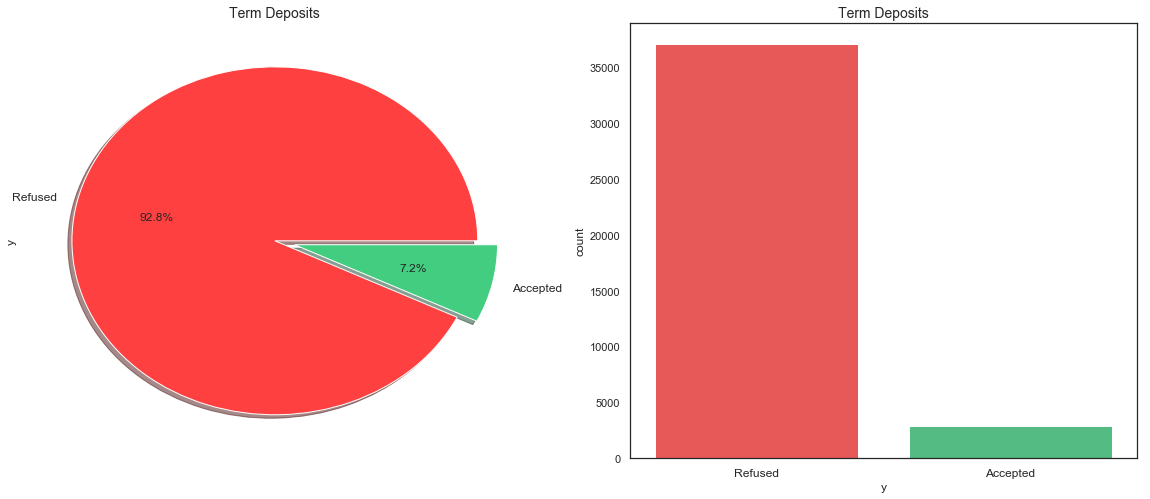

In [154]:
f,ax = plt.subplots(1,2,figsize=(20,8))
colors = ["#FF4040", "#43CD80"]
labels = "Refused", "Accepted"
df["y"].value_counts().plot.pie(explode=[0,0.1], autopct = "%1.1f%%", ax = ax[0], shadow = True, labels = labels, colors = colors, fontsize = 12)
ax[0].set_title("Term Deposits", fontsize = 14)
sns.countplot("y", data = df,ax = ax[1], palette = colors)
ax[1].set_title("Term Deposits", fontsize = 14)
ax[1].set_xticklabels(["Refused", "Accepted"], fontsize = 12)
plt.show()

Text(0.5,1,'Frequency of Distribution of Deposits by Age')

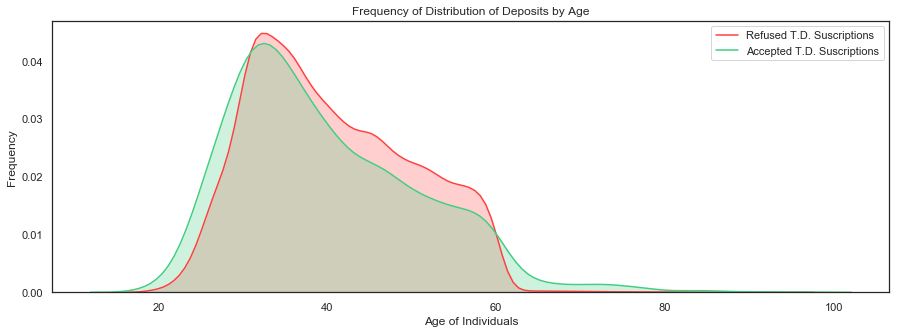

In [155]:
fig = plt.figure(figsize = (15,5),)
ax = sns.kdeplot(df.loc[(df["y_int"] == 0), "age"] , color = "#FF4040", shade = True, label = "Refused T.D. Suscriptions")
ax = sns.kdeplot(df.loc[(df["y_int"] == 1), "age"] , color = "#43CD80", shade = True, label = "Accepted T.D. Suscriptions")
ax.set(xlabel = "Age of Individuals", ylabel = "Frequency")
plt.title("Frequency of Distribution of Deposits by Age")

In [156]:
lst = [df]
for column in lst:
    column.loc[column["age"] < 30,  "age_cat"] = 20
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), "age_cat"] = 30
    column.loc[(column["age"] >= 40) & (column["age"] <= 49), "age_cat"] = 40
    column.loc[(column["age"] >= 50) & (column["age"] <= 59), "age_cat"] = 50
    column.loc[column["age"] >= 60, "age_cat"] = 60
 
df["age_cat"] = df["age_cat"].astype(np.int64)

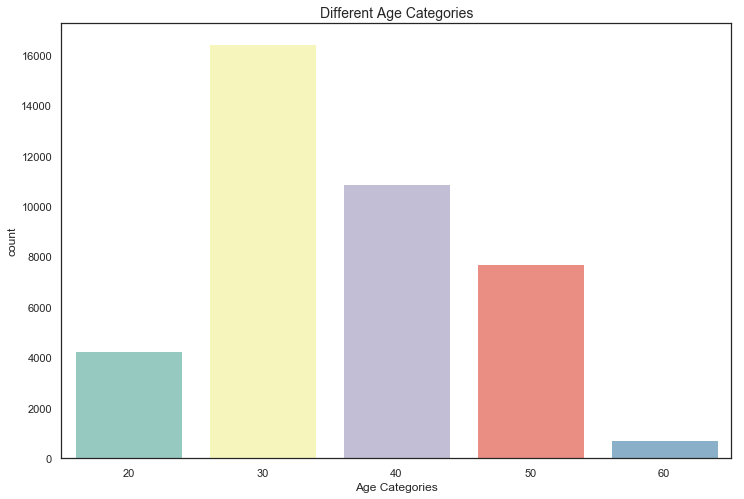

In [157]:
sns.set(style = "white")
fig, ax = plt.subplots(figsize = (12,8))
sns.countplot(x = "age_cat", data = df, palette = "Set3")
ax.set_title("Different Age Categories", fontsize = 14)
ax.set_xlabel("Age Categories")
plt.show()

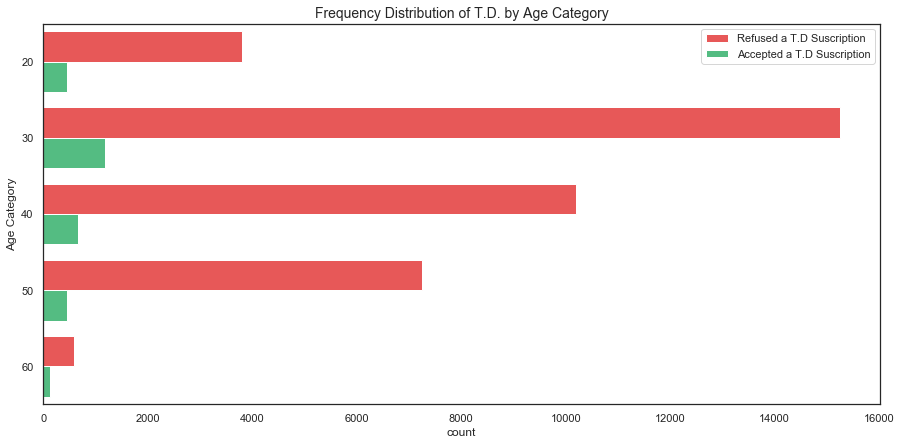

In [159]:
sns.set(style= "white")
fig, ax = plt.subplots(figsize = (15, 7))
colors = ["#FF4040", "#43CD80"]
sns.countplot(y = "age_cat", hue = "y_int", data = df, palette = colors).set_title("Frequency Distribution of T.D. by Age Category", fontsize = 14)
ax.set_ylabel("Age Category")
legend_name = plt.legend()
legend_name.get_texts()[0].set_text("Refused a T.D Suscription")
legend_name.get_texts()[1].set_text("Accepted a T.D Suscription")

In [161]:
cross_age_category = pd.crosstab(df["y_int"], df["age_cat"]).apply(lambda x: x/x.sum() * 100)
cross_age_category

age_cat,20,30,40,50,60
y_int,,,,,
0,89.120262,92.814991,93.828182,94.174252,81.980743
1,10.879738,7.185009,6.171818,5.825748,18.019257


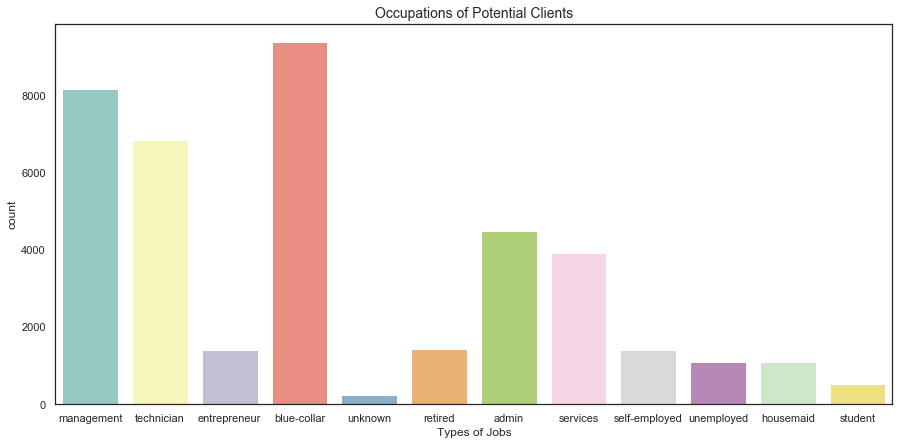

In [164]:
sns.set(style = "white")
fig, ax = plt.subplots(figsize = (15,7))
sns.countplot(x = "job", data = df, palette = "Set3")
ax.set_title("Occupations of Potential Clients", fontsize = 14)
ax.set_xlabel("Types of Jobs")
plt.show()

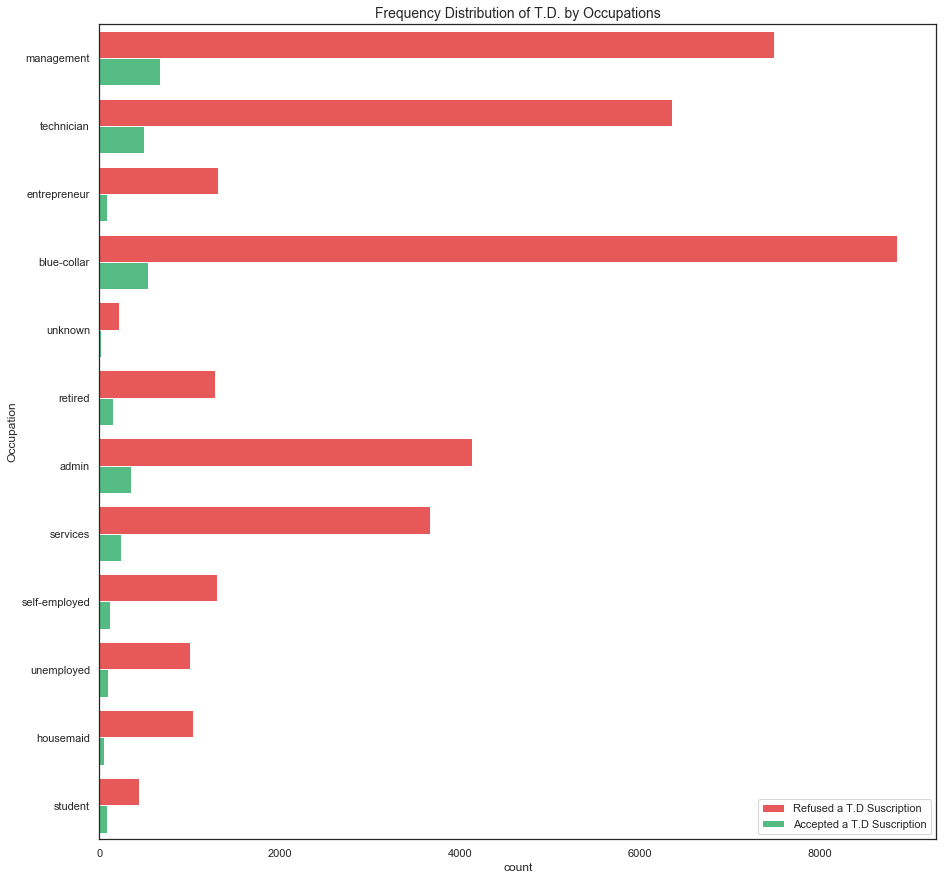

In [165]:
sns.set(style= "white")
fig, ax = plt.subplots(figsize = (15, 15))
colors = ["#FF4040", "#43CD80"]
sns.countplot(y = "job", hue = "y_int", data = df, palette = colors).set_title("Frequency Distribution of T.D. by Occupations", fontsize = 14)
ax.set_ylabel("Occupation")
legend_name = plt.legend()
legend_name.get_texts()[0].set_text("Refused a T.D Suscription")
legend_name.get_texts()[1].set_text("Accepted a T.D Suscription")

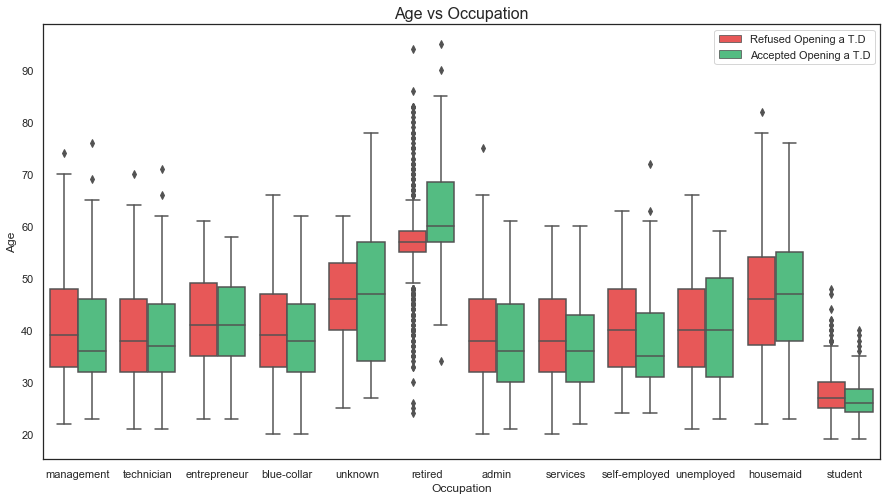

In [166]:
ax = plt.figure(figsize=(15,8))
ax = sns.boxplot(x = "job", y="age", hue = "y_int",
                  data=df, palette={0:'#FF4040', 1:'#43CD80'})
plt.title("Age vs Occupation", fontsize=16)
plt.xlabel(s = "Occupation")
plt.ylabel(s = "Age")
legend_name = plt.legend()
legend_name.get_texts()[0].set_text('Refused Opening a T.D')
legend_name.get_texts()[1].set_text('Accepted Opening a T.D')

plt.show()

In [167]:
cross_age_category = pd.crosstab(df["y_int"], df["job"]).apply(lambda x: x/x.sum() * 100)
cross_age_category

job,admin,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
y_int,,,,,,,,,,,,
0,92.170422,94.298199,93.736655,95.124195,91.721773,89.491997,92.079208,93.913043,84.351145,92.746643,91.304348,92.765957
1,7.829578,5.701801,6.263345,4.875805,8.278227,10.508003,7.920792,6.086957,15.648855,7.253357,8.695652,7.234043


In [168]:
cross_age_category = pd.crosstab(df["y_int"], df["job_cat"]).apply(lambda x: x/x.sum() * 100)
cross_age_category

job_cat,1,2,3
y_int,,,
0,91.59322,93.415809,92.067494
1,8.40678,6.584191,7.932506


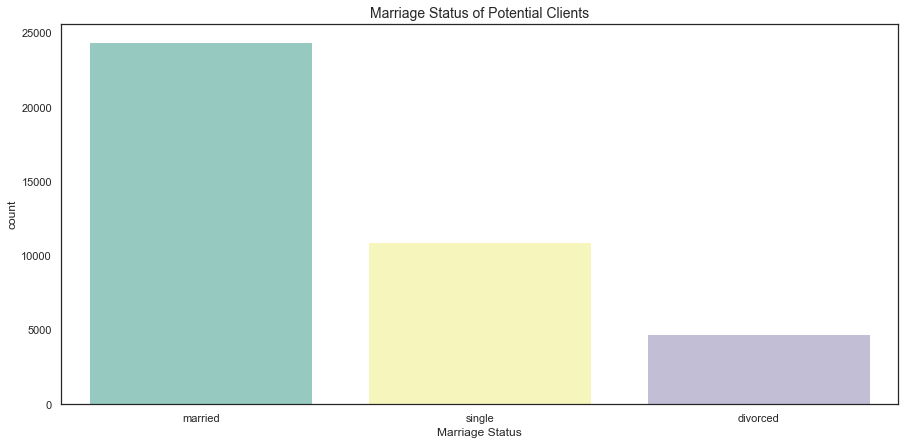

In [169]:
sns.set(style = "white")
fig, ax = plt.subplots(figsize = (15,7))
sns.countplot(x = "marital", data = df, palette = "Set3")
ax.set_title("Marriage Status of Potential Clients", fontsize = 14)
ax.set_xlabel("Marriage Status")
plt.show()

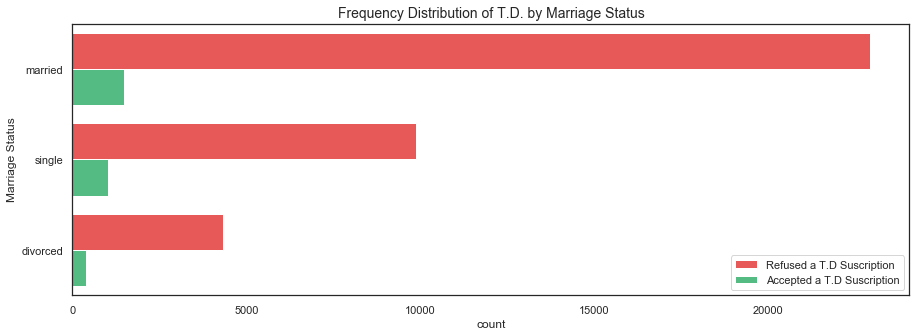

In [172]:
sns.set(style= "white")
fig, ax = plt.subplots(figsize = (15, 5))
colors = ["#FF4040", "#43CD80"]
sns.countplot(y = "marital", hue = "y_int", data = df, palette = colors).set_title("Frequency Distribution of T.D. by Marriage Status", fontsize = 14)
ax.set_ylabel("Marriage Status")
legend_name = plt.legend()
legend_name.get_texts()[0].set_text("Refused a T.D Suscription")
legend_name.get_texts()[1].set_text("Accepted a T.D Suscription")

In [173]:
cross_age_category = pd.crosstab(df["y_int"], df["marital"]).apply(lambda x: x/x.sum() * 100)
cross_age_category

marital,divorced,married,single
y_int,,,
0,91.724868,93.939145,90.568464
1,8.275132,6.060855,9.431536


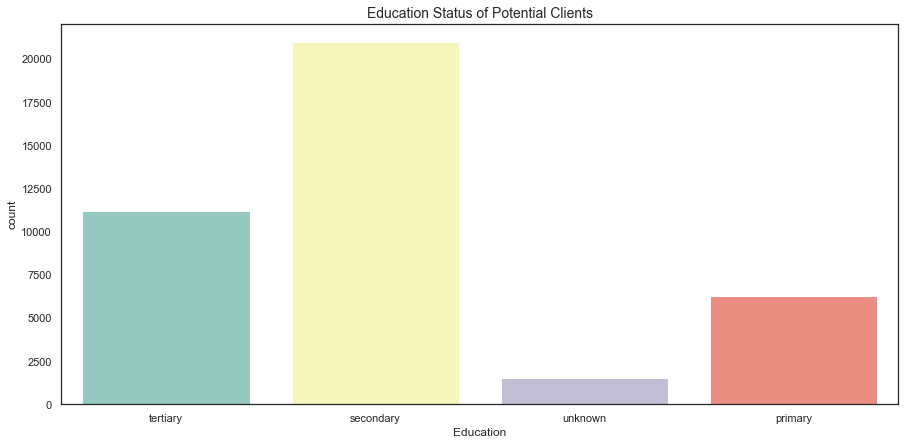

In [174]:
sns.set(style = "white")
fig, ax = plt.subplots(figsize = (15,7))
sns.countplot(x = "education", data = df, palette = "Set3")
ax.set_title("Education Status of Potential Clients", fontsize = 14)
ax.set_xlabel("Education")
plt.show()

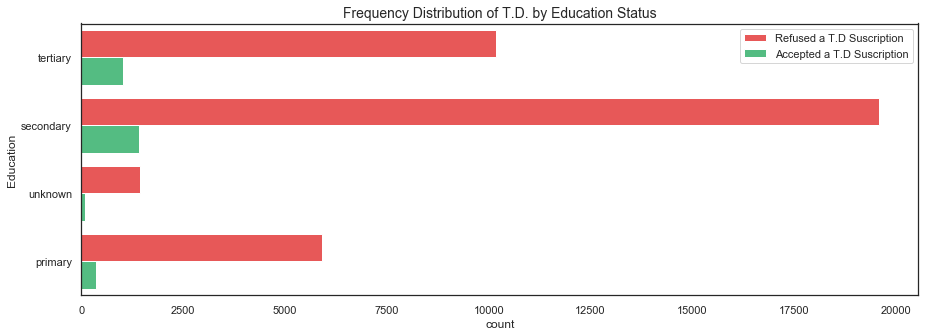

In [175]:
sns.set(style= "white")
fig, ax = plt.subplots(figsize = (15, 5))
colors = ["#FF4040", "#43CD80"]
sns.countplot(y = "education", hue = "y_int", data = df, palette = colors).set_title("Frequency Distribution of T.D. by Education Status", fontsize = 14)
ax.set_ylabel("Education")
legend_name = plt.legend()
legend_name.get_texts()[0].set_text("Refused a T.D Suscription")
legend_name.get_texts()[1].set_text("Accepted a T.D Suscription")

In [176]:
cross_age_category = pd.crosstab(df["y_int"], df["education"]).apply(lambda x: x/x.sum() * 100)
cross_age_category

education,primary,secondary,tertiary,unknown
y_int,,,,
0,94.370016,93.245368,90.817419,93.729589
1,5.629984,6.754632,9.182581,6.270411


In [177]:
cross_age_category = pd.crosstab(df["y_int"], df["housing"]).apply(lambda x: x/x.sum() * 100)
cross_age_category

housing,no,yes
y_int,,
0,91.032626,93.907869
1,8.967374,6.092131


In [178]:
cross_age_category = pd.crosstab(df["y_int"], df["loan"]).apply(lambda x: x/x.sum() * 100)
cross_age_category

loan,no,yes
y_int,,
0,92.391896,94.516595
1,7.608104,5.483405


Text(0.5,1,'Frequency Distribution of Deposits by Months')

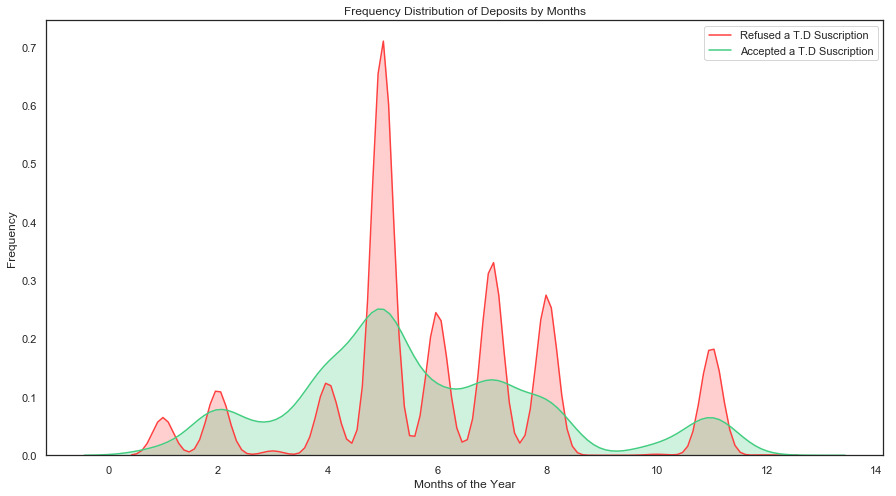

In [179]:
fig = plt.figure(figsize=(15,8),)
ax = sns.kdeplot(df.loc[(df["y_int"] == 0), "month_int"] , color = '#FF4040', shade = True, label = "Refused a T.D Suscription")
ax = sns.kdeplot(df.loc[(df["y_int"] == 1), "month_int"] , color = '#43CD80', shade = True, label = "Accepted a T.D Suscription")
ax.set(xlabel = "Months of the Year", ylabel = "Frequency")
plt.title("Frequency Distribution of Deposits by Months")

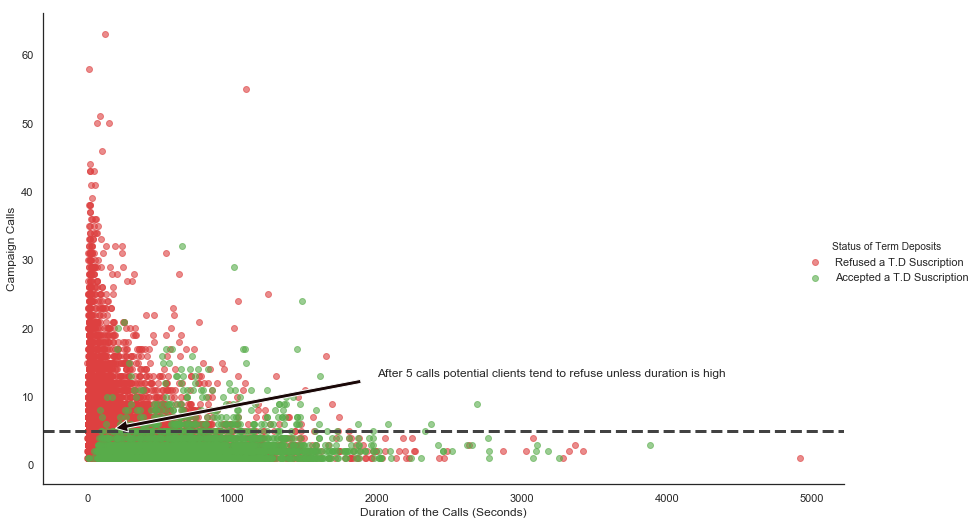

In [180]:
colors = ['#DD4040', '#58AD4B', '#0096AA', '#9B00AA']

g = sns.lmplot(x = "duration", y = "campaign", data = df,
           fit_reg = False,
           hue = "y_int",
        palette = colors,
        scatter_kws={"alpha": 0.6}) 

g.fig.set_size_inches(15,8)

new_title = "Status of Term Deposits"
g._legend.set_title(new_title)

new_labels = ['Refused a T.D Suscription', 'Accepted a T.D Suscription']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

plt.axhline(y = 5, linewidth = 3, color = "#424242", linestyle = "--")
plt.annotate("After 5 calls potential clients tend to refuse unless duration is high", xy=(100, 5), xytext=(2000,13),
            arrowprops=dict(facecolor='#190707', shrink=0.05))
plt.xlabel("Duration of the Calls (Seconds)")
plt.ylabel("Campaign Calls")

plt.show()

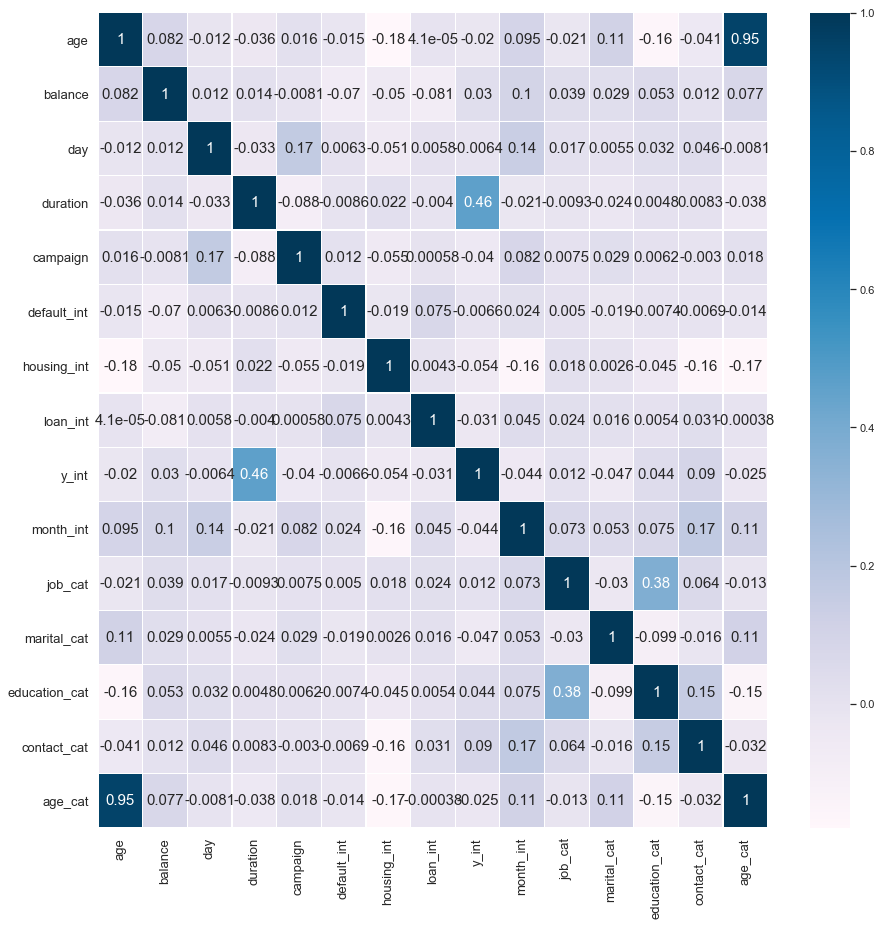

In [181]:
corr = df.corr()

sns.heatmap(corr, annot = True, cmap = "PuBu", linewidths = 0.2, annot_kws = {"size":15})
fig=plt.gcf()
fig.set_size_inches(15,15)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.show()

In [182]:
df2 = pd.concat([df.age, df.balance, df.day, df.duration, df.campaign, df.y_int, df.housing_int, df.loan_int,
               df.default_int, df.month_int, df.job_cat, df.marital_cat, df.education_cat, df.contact_cat], axis = 1)
df2.head()

,age,balance,day,duration,campaign,y_int,housing_int,loan_int,default_int,month_int,job_cat,marital_cat,education_cat,contact_cat
0,58,2143,5,261,1,0,1,0,0,5,3,2,3,0.0
1,44,29,5,151,1,0,1,0,0,5,2,1,2,0.0
2,33,2,5,76,1,0,1,1,0,5,3,2,2,0.0
3,47,1506,5,92,1,0,1,0,0,5,2,2,0,0.0
4,33,1,5,198,1,0,0,0,0,5,1,1,0,0.0


In [183]:
X = df2.drop(["y_int"], axis=1)
y = df2.y_int

print(X.shape)

(40000, 13)


In [184]:
X = (X - X.min())/(X.max()-X.min())
X.head()

,age,balance,day,duration,campaign,housing_int,loan_int,default_int,month_int,job_cat,marital_cat,education_cat,contact_cat
0,0.513158,0.092259,0.133333,0.053070,0.0,1.0,0.0,0.0,0.363636,1.0,1.0,1.000000,0.0
1,0.328947,0.073067,0.133333,0.030704,0.0,1.0,0.0,0.0,0.363636,0.5,0.5,0.666667,0.0
2,0.184211,0.072822,0.133333,0.015453,0.0,1.0,1.0,0.0,0.363636,1.0,1.0,0.666667,0.0
3,0.368421,0.086476,0.133333,0.018707,0.0,1.0,0.0,0.0,0.363636,0.5,1.0,0.000000,0.0
4,0.184211,0.072812,0.133333,0.040260,0.0,0.0,0.0,0.0,0.363636,0.0,0.5,0.000000,0.0


In [185]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [186]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

accuracies = {}

acc = lr.score(X_test,y_test)*100

accuracies["Logistic Regression"] = acc
print("LR Accuracy Ratio {:.2f}%".format(acc))

LR Accuracy Ratio 93.62%


In [187]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

acc = knn.score(X_test,y_test)*100

accuracies["KNeighbors Classifier"] = acc
print("KNN Accuracy Ratio {:.2f}%".format(acc))

KNN Accuracy Ratio 93.09%


In [188]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

acc = nb.score(X_test, y_test)*100

accuracies["Naive Bayes"] = acc
print("NB Accuracy Ratio {:.2f}%".format(acc))

NB Accuracy Ratio 93.27%


In [189]:
from sklearn.svm import SVC

svm = SVC(random_state = 1)
svm.fit(X_train, y_train)

acc = svm.score(X_test, y_test)*100

accuracies["Suppot Vector Machine"] = acc
print("SVM Accuracy Ratio {:.2f}%".format(acc))

SVM Accuracy Ratio 93.20%


In [190]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(X_train, y_train)

acc = rf.score(X_test, y_test)*100

accuracies["Random Forest"] = acc
print("RF Accuracy Ratio {:.2f}%".format(acc))

RF Accuracy Ratio 93.80%


In [191]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

acc = dtc.score(X_test, y_test)*100

accuracies["Decision Tree Classifier"] = acc
print("DTC Accuracy Ratio {:.2f}%".format(acc))

DTC Accuracy Ratio 91.84%


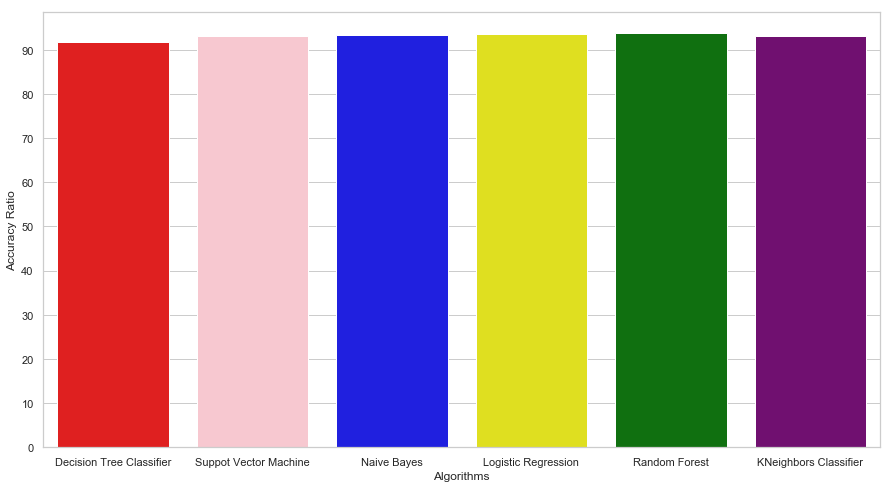

In [192]:
colors = ["red", "pink", "blue", "yellow", "green", "purple"]

sns.set_style("whitegrid")
plt.figure(figsize = (15,8))
plt.yticks(np.arange(0,100,10))
plt.xlabel("Algorithms")
plt.ylabel("Accuracy Ratio")
sns.barplot(x = list(accuracies.keys()), y = list(accuracies.values()), palette = colors)
plt.show()


Değelendrime:

Vadeli mevzuat için abone olma durumlarını çeşitli öznitelikler etrafında inceledik. Bunula beraber 6 tip makine öğrenmesi algoritması kullanarak çeşitli doğruluk değerleri elde ettik. Öznitelikleri çeşitli grafikasyon işlemleri sonucunda incelediğimizde; ağırlıklı olarak 20'li ve 60+ yaşlarındaki bireylerin V.M. açtığını görmekteyiz. Meslekler nezdinde değerlendirdiğimizde emekli, çalışmayan kişilerin (veri setinde meslekleri kategorileştirdiğimizde en alt basamağı oluşturan grup) hesap açtırma oranını yüksek görmekteyiz. Bununla beraber bireylerin kullandığı konut kredisi veya kişisel kredi durumlar V.M. hesabı açtırma adına negatif bir etki göstermektedir. Ayrıca ortlama olarak 5 aramadan sonra potansiyel müşterilerin konuşma süresi yüksek olmadığı durumlada reddetme eğilimi göstermektedir.